In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('advertising.csv')

In [4]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [7]:
print(data.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>


In [8]:
x=data.drop('Sales', axis=1)
y=data['Sales'] 

In [9]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
x_train

,TV,Radio,Newspaper
188,286.0,13.9,3.7
148,38.0,40.3,11.9
193,166.8,42.0,3.6
92,217.7,33.5,59.0
100,222.4,4.3,49.8
...,...,...,...
26,142.9,29.3,12.6
29,70.6,16.0,40.8
82,75.3,20.3,32.5
191,75.5,10.8,6.0


In [16]:
y_train

188    20.9
148    10.9
193    19.6
92     19.4
100    16.7
       ... 
26     15.0
29     10.5
82     11.3
191    11.9
162    19.9
Name: Sales, Length: 160, dtype: float64

In [17]:
y_pred=lr.predict(x_test)
print(y_pred)

[19.1032772  16.33288876  8.6401123  12.210619   14.99298742 18.00974706
 10.61141351 18.22027876 13.8928585  13.7900139  23.11689276 15.26421438
 17.17564172 16.49226475 18.99699503 18.08194148 22.72382293 11.31149346
 19.35905464 15.77693012 18.49093876  9.61466678 21.00014126 12.33721345
 18.08968509  8.94211777 10.40472854  7.2533379  19.51440724 19.57500028
 24.96530303 21.82417404  5.48864153 14.00775064 12.49396981  9.8908367
  6.10786324 19.57573668 18.78448086 15.27029563]


In [18]:
lr.predict([[100.4,9.6,3.6]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.12514799])

In [19]:
lr.coef_

array([0.05433293, 0.10431586, 0.00302108])

In [20]:
from sklearn.metrics import r2_score 
mean_squared_error(y_test,y_pred)

1.4558594051564064

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9427103868049435

In [22]:
example= pd.DataFrame([[177.0, 9.3, 6.4]], columns=['TV', 'Radio', 'Newspaper'])
example = lr.predict(example)
print('Prediction for Examples:',example)

Prediction for Examples: [15.26421438]


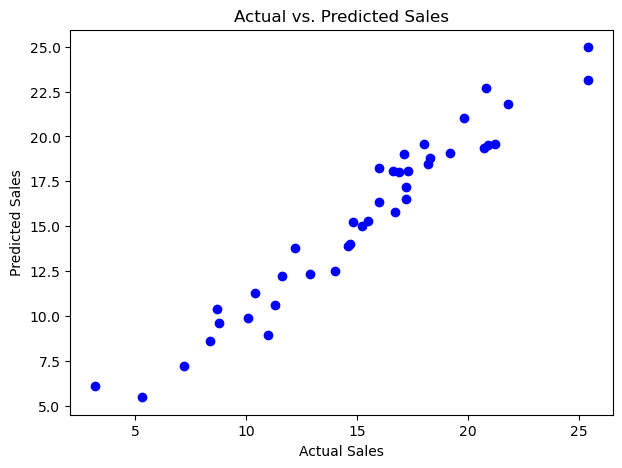

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred, color="b")
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show() 

In [24]:
pred_y_df=pd.DataFrame({'Actual sales':y_test,'Predicted sales':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:15]

,Actual sales,Predicted sales,Difference
141,19.2,19.103277,0.096723
64,16.0,16.332889,-0.332889
170,8.4,8.640112,-0.240112
135,11.6,12.210619,-0.610619
123,15.2,14.992987,0.207013
165,16.9,18.009747,-1.109747
18,11.3,10.611414,0.688586
153,16.0,18.220279,-2.220279
114,14.6,13.892859,0.707141
116,12.2,13.790014,-1.590014


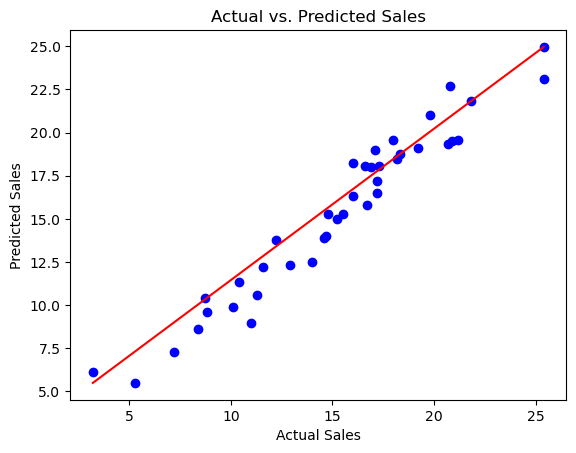

In [25]:
plt.scatter(y_test,y_pred, color="b")
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color="r") 
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show() 